In [ ]:
#Sample Paper

3. a)Use the NLP_model.csv data.The “review” column contains the review of several 
e-shopping items and the “Star” column contains the rating given by the customers.

  i) Add a column named ‘Emotion’ if the “Star” i.e the rating column is more than 3 mention ‘positive’ otherwise
  ‘negative’ (Marks – 1)

  ii) Clean the “review” data as required.(Marks – 12)
                                         
  iii) Split the data into train and test.[with 85:15 ration with seed 2] (Marks – 2)


3. b) i) Preprocess the data if necessary. (Marks – 5)
  
   ii) Build a model from scratch to analyse the sentiment of the review. (Marks – 10)


In [166]:
#importing libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
import random

In [168]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sample paper\\NLP_model.csv')
df.head()#first 5 records

,Unnamed: 0,Review,Star
0,0,Got this pice of machine delivered right next ...,4.4
1,1,"Product was okay, but amazon is not providing ...",4.0
2,2,They say it's touch panel. It's not. Hiding bu...,1.0
3,3,Ordered on 3rd October delivered on 7th Octobe...,4.0
4,4,my product from amazon was very good they have...,4.0


In [169]:
df.shape#total 204 records

(204, 3)

In [170]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  204 non-null    int64  
 1   Review      203 non-null    object 
 2   Star        204 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [171]:
df1=df.copy()#making opy of the original dataframe

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  204 non-null    int64  
 1   Review      203 non-null    object 
 2   Star        204 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [173]:
#Q3.a)i) 
#Add a column named ‘Emotion’ if the “Star” i.e the rating column is more than 3 mention ‘positive’ otherwise ‘negative’ (Marks – 1)

In [174]:
df1['Emotion']=0#creating a blank column
for i in range(0,df1.shape[0]):
    if df1['Star'][i] > 3.0:
        df1['Emotion'][i]='positive'
    else:
        df1['Emotion'][i]='negative'

In [175]:
df1.tail(103)#checking

,Unnamed: 0,Review,Star,Emotion
101,21,NaN,1.0,negative
102,22,Good one,1.0,negative
103,23,Dislike,4.0,positive
104,24,Must buy laptopWorks great for the pricePremiu...,4.0,positive
105,25,I bought this laptop about a month ago.This is...,4.0,positive
...,...,...,...,...
199,85,"Well, the product is decent for the price it's...",1.0,negative
200,86,Product received in good condition but stoppe...,2.0,negative
201,87,Its been 5 days. At first the device was perf...,4.0,positive
202,88,My mobile all of sudden went dead and hilariou...,1.0,negative


In [176]:
df1['Emotion'].value_counts()

positive    112
negative     92
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

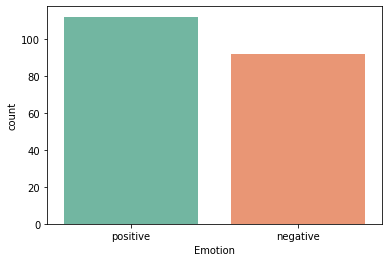

In [177]:
sns.countplot(df1['Emotion'],palette="Set2")

In [178]:
##Q3.a)
#ii) Clean the “review” data as required.(Marks – 12)

In [179]:
df1.head()

,Unnamed: 0,Review,Star,Emotion
0,0,Got this pice of machine delivered right next ...,4.4,positive
1,1,"Product was okay, but amazon is not providing ...",4.0,positive
2,2,They say it's touch panel. It's not. Hiding bu...,1.0,negative
3,3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive
4,4,my product from amazon was very good they have...,4.0,positive


In [180]:
#Step1:checking for missing values

In [181]:
df1.isnull().sum()#checking for missing values

Unnamed: 0    0
Review        1
Star          0
Emotion       0
dtype: int64

In [182]:
df1 = df1.dropna(axis=0)

In [183]:
df1.isnull().sum()#checking for missing values

Unnamed: 0    0
Review        0
Star          0
Emotion       0
dtype: int64

In [184]:
#Step2: Dropping the unnamed column

In [185]:
df1.columns

Index(['Unnamed: 0', 'Review', 'Star', 'Emotion'], dtype='object')

In [186]:
df1=df1.drop('Unnamed: 0',axis=1)
df1.head()

,Review,Star,Emotion
0,Got this pice of machine delivered right next ...,4.4,positive
1,"Product was okay, but amazon is not providing ...",4.0,positive
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive
4,my product from amazon was very good they have...,4.0,positive


In [187]:
#Step2: Converting to lowecase and replace

In [188]:
df1['Review_clean']=df1['Review'].str.lower().str.replace('[^a-z\s]','')
df1.head()

,Review,Star,Emotion,Review_clean
0,Got this pice of machine delivered right next ...,4.4,positive,got this pice of machine delivered right next ...
1,"Product was okay, but amazon is not providing ...",4.0,positive,product was okay but amazon is not providing t...
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative,they say its touch panel its not hiding button...
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive,ordered on rd october delivered on th octoberp...
4,my product from amazon was very good they have...,4.0,positive,my product from amazon was very good they have...


In [189]:
#Step 3: tokenize

In [190]:
df1['Review_clean']=df1['Review_clean'].str.split(' ')
df1.head()

,Review,Star,Emotion,Review_clean
0,Got this pice of machine delivered right next ...,4.4,positive,"[got, this, pice, of, machine, delivered, righ..."
1,"Product was okay, but amazon is not providing ...",4.0,positive,"[product, was, okay, but, amazon, is, not, pro..."
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative,"[they, say, its, touch, panel, its, not, hidin..."
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive,"[ordered, on, rd, october, delivered, on, th, ..."
4,my product from amazon was very good they have...,4.0,positive,"[my, product, from, amazon, was, very, good, t..."


In [191]:
#Step 4: Remove Stopwords

In [192]:
import nltk
common_stopwords=nltk.corpus.stopwords.words('english')

In [193]:
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [194]:
len(common_stopwords)

179

In [195]:
common_stopwords.remove('didn')
common_stopwords.remove('no')
common_stopwords.remove('nor')
common_stopwords.remove('not')

In [196]:
def drop_stopwords(text):
    return [word for word in text if word not in common_stopwords]

In [197]:
df1['Review_clean']=df1['Review_clean'].apply(drop_stopwords)
df1.head()

,Review,Star,Emotion,Review_clean
0,Got this pice of machine delivered right next ...,4.4,positive,"[got, pice, machine, delivered, right, next, d..."
1,"Product was okay, but amazon is not providing ...",4.0,positive,"[product, okay, amazon, not, providing, access..."
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative,"[say, touch, panel, not, hiding, buttons, behi..."
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive,"[ordered, rd, october, delivered, th, octoberp..."
4,my product from amazon was very good they have...,4.0,positive,"[product, amazon, good, delivered, timemy, ove..."


In [198]:
#Step 5: Lemmitization

In [199]:
from nltk.stem.wordnet import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

In [200]:
def Lemmitization(text):
    return [Lemmatizer.lemmatize(word) for word in text]

In [201]:
df1['Review_clean']=df1['Review_clean'].apply(Lemmitization)
df1.head()

,Review,Star,Emotion,Review_clean
0,Got this pice of machine delivered right next ...,4.4,positive,"[got, pice, machine, delivered, right, next, d..."
1,"Product was okay, but amazon is not providing ...",4.0,positive,"[product, okay, amazon, not, providing, access..."
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative,"[say, touch, panel, not, hiding, button, behin..."
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive,"[ordered, rd, october, delivered, th, octoberp..."
4,my product from amazon was very good they have...,4.0,positive,"[product, amazon, good, delivered, timemy, ove..."


In [202]:
#Step 6 : cleaning the text

In [203]:
df1['Review_clean']=df1['Review_clean'].apply(lambda x: ' '.join(x))
df1.head()

,Review,Star,Emotion,Review_clean
0,Got this pice of machine delivered right next ...,4.4,positive,got pice machine delivered right next day orde...
1,"Product was okay, but amazon is not providing ...",4.0,positive,product okay amazon not providing accessory me...
2,They say it's touch panel. It's not. Hiding bu...,1.0,negative,say touch panel not hiding button behind gloss...
3,Ordered on 3rd October delivered on 7th Octobe...,4.0,positive,ordered rd october delivered th octoberpacking...
4,my product from amazon was very good they have...,4.0,positive,product amazon good delivered timemy oven work...


In [204]:
##Q3.a)iii) Split the data into train and test.[with 85:15 ration with seed 2] (Marks – 2)

In [205]:
df2=df1.iloc[:,2:]#creating a new dataframe
df2.head()

,Emotion,Review_clean
0,positive,got pice machine delivered right next day orde...
1,positive,product okay amazon not providing accessory me...
2,negative,say touch panel not hiding button behind gloss...
3,positive,ordered rd october delivered th octoberpacking...
4,positive,product amazon good delivered timemy oven work...


In [276]:
from sklearn.feature_extraction.text import CountVectorizer

In [277]:
cv = CountVectorizer(max_features=3500)

In [278]:
X=cv.fit_transform(df2['Review_clean'])

In [279]:
Y=df2['Emotion']

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
x_tain,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.15, random_state=2,shuffle=False)

In [282]:
print(x_tain.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 2766)
(31, 2766)
(172,)
(31,)


In [283]:
#3. b) i) Preprocess the data if necessary. (Marks – 5)

In [284]:
#------------------------------

In [285]:
#3. b) ii) Build a model from scratch to analyse the sentiment of the review. (Marks – 10)

In [286]:
#1. Decision Tree Classifier

In [287]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth=5)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_tain,y_train)

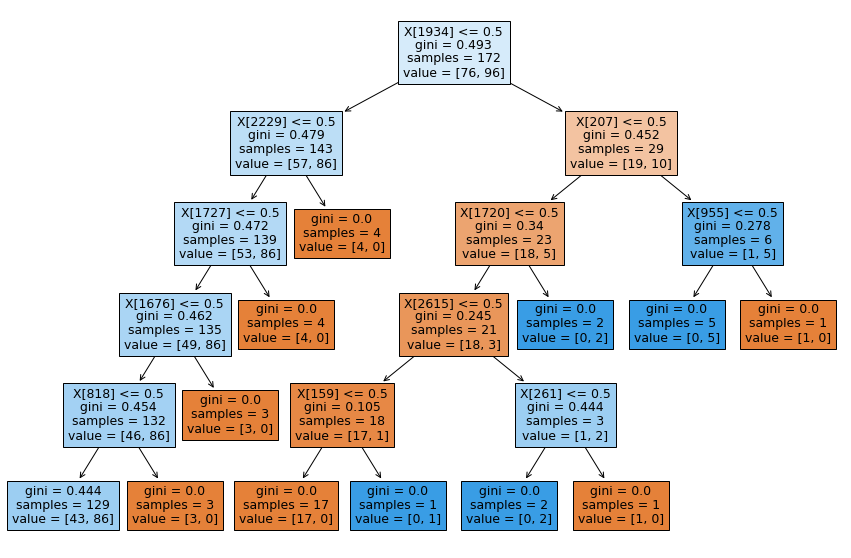

In [288]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [289]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(x_test)
from sklearn import metrics
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Decision Tree Classifier: 0.6451612903225806


In [290]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt = classification_report(y_test, dt_preds)
# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

    negative       0.67      0.53      0.59        15
    positive       0.63      0.75      0.69        16

    accuracy                           0.65        31
   macro avg       0.65      0.64      0.64        31
weighted avg       0.65      0.65      0.64        31



In [291]:
#2. Random Forest Classifier

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
Random_Forest_Classifier=RandomForestClassifier()
# fit the model using fit() on train data
Random_Forest = Random_Forest_Classifier.fit(x_tain,y_train)

In [294]:
# apply the model on unseen testing data
Rf_preds = Random_Forest_Classifier.predict(x_test)
from sklearn import metrics
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))

Accuracy of Random Forest Classifier: 0.5161290322580645


In [295]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rf = classification_report(y_test, Rf_preds)
# print the performace measures
print(test_report_rf)

              precision    recall  f1-score   support

    negative       0.50      0.27      0.35        15
    positive       0.52      0.75      0.62        16

    accuracy                           0.52        31
   macro avg       0.51      0.51      0.48        31
weighted avg       0.51      0.52      0.49        31



In [296]:
#3. K Nearest Neighbour Classifier

In [297]:
from sklearn.neighbors import KNeighborsClassifier

In [298]:
# define the K nearest neighbours model
KNeighbors_classifier = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
KNeighbors=KNeighbors_classifier.fit(x_tain,y_train)

In [299]:
# apply the model on unseen testing data
kn_preds = KNeighbors.predict(x_test)
from sklearn import metrics
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

Accuracy of KNeighbors Classifier: 0.5483870967741935


In [300]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)

              precision    recall  f1-score   support

    negative       0.60      0.20      0.30        15
    positive       0.54      0.88      0.67        16

    accuracy                           0.55        31
   macro avg       0.57      0.54      0.48        31
weighted avg       0.57      0.55      0.49        31



In [301]:
#4. AdaBoostClassifier

In [302]:
from sklearn.ensemble import AdaBoostClassifier

In [303]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(x_tain,y_train)

In [304]:
# apply the model on unseen testing data
Ab_preds = AdaBoost.predict(x_test)
from sklearn import metrics
print("Accuracy of AdaBoost Classifier:", metrics.accuracy_score(y_test, Ab_preds))

Accuracy of AdaBoost Classifier: 0.4838709677419355


In [305]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_Ab = classification_report(y_test, Ab_preds)
# print the performace measures
print(test_report_Ab)

              precision    recall  f1-score   support

    negative       0.46      0.40      0.43        15
    positive       0.50      0.56      0.53        16

    accuracy                           0.48        31
   macro avg       0.48      0.48      0.48        31
weighted avg       0.48      0.48      0.48        31



In [273]:
#4. a) i)Apply the model prepared earlier on the test data. (Marks – 6)

In [306]:
#we have created 4 models:
#1.Decision Tree Classifier
#2.Random_Forest_Classifier
#3.KNeighborsClassifier
#4.AdaBoostClassifier

In [307]:
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))
print("Accuracy of AdaBoost Classifier:", metrics.accuracy_score(y_test, Ab_preds))

Accuracy of Decision Tree Classifier: 0.6451612903225806
Accuracy of Random Forest Classifier: 0.5161290322580645
Accuracy of KNeighbors Classifier: 0.5483870967741935
Accuracy of AdaBoost Classifier: 0.4838709677419355


In [308]:
#from the above we can see that Decision Tree Classifier has the good accuracy with respect to others

In [309]:
#4. a) ii) Apply an inbuilt sentiment analysis function on the test data (Marks – 5)

In [310]:
df2.head()

,Emotion,Review_clean
0,positive,got pice machine delivered right next day orde...
1,positive,product okay amazon not providing accessory me...
2,negative,say touch panel not hiding button behind gloss...
3,positive,ordered rd october delivered th octoberpacking...
4,positive,product amazon good delivered timemy oven work...


In [311]:
X1=df2['Review_clean']

In [312]:
Y1=df2['Emotion']

In [313]:
x_tain1,x_test1,y_train1,y_test1=train_test_split(X1, Y1, test_size=0.15, random_state=2,shuffle=False)

In [314]:
print(x_tain1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(172,)
(31,)
(172,)
(31,)


In [315]:
x_test1=pd.DataFrame(x_test1)
x_test1.head()

,Review_clean
173,firstly phone available r le within two month...
174,update general user month usefirstly jumped e...
175,good one costlygood camera performance lowligh...
176,worse sellerreplacement policy amazon verry ba...
177,worst camera full bloatwaresamsung building c...


In [316]:
#1. Sentiment analysis using TextBlob

In [317]:
from textblob import TextBlob

In [318]:
x_test1["Sentiment_score_Review_clean"]=[round(TextBlob(article).sentiment.polarity, 3) for article in x_test1['Review_clean']]

In [319]:
x_test1.head()

,Review_clean,Sentiment_score_Review_clean
173,firstly phone available r le within two month...,0.036
174,update general user month usefirstly jumped e...,-0.050
175,good one costlygood camera performance lowligh...,0.282
176,worse sellerreplacement policy amazon verry ba...,-0.110
177,worst camera full bloatwaresamsung building c...,-0.483


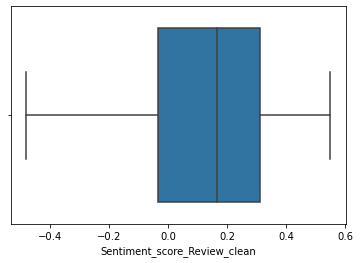

In [320]:
sns.boxplot(x_test1['Sentiment_score_Review_clean'])
plt.show()

In [321]:
#applying the labels

In [322]:
#crating fucntion for the labels
def get_sentiment_label(score):
    if score > 0.25:
        return 'positive'
    else:
        return 'negative'

In [323]:
x_test1['Sentiment_TextBlob_label'] = x_test1['Sentiment_score_Review_clean'].apply(get_sentiment_label)
x_test1.head()

,Review_clean,Sentiment_score_Review_clean,Sentiment_TextBlob_label
173,firstly phone available r le within two month...,0.036,negative
174,update general user month usefirstly jumped e...,-0.050,negative
175,good one costlygood camera performance lowligh...,0.282,positive
176,worse sellerreplacement policy amazon verry ba...,-0.110,negative
177,worst camera full bloatwaresamsung building c...,-0.483,negative


In [324]:
print('review Text Sentiment analysis using TextBlob:')
print()
x_test1['Sentiment_TextBlob_label'].value_counts()

review Text Sentiment analysis using TextBlob:



negative    20
positive    11
Name: Sentiment_TextBlob_label, dtype: int64

In [325]:
#4. a) iii) Compare the model you have created the in-built sentiment analysis function with the actual data and 
#find out which function works better.(Marks – 4)

In [326]:
x_test1_inbuilt=x_test1['Sentiment_TextBlob_label']

In [327]:
print("Accuracy :", metrics.accuracy_score(y_test, x_test1_inbuilt))

Accuracy : 0.5806451612903226


In [329]:
#Decision Tree Classifier model is better than the inbulit fucntion (textblob used)

In [ ]:
#-------------------------------------------------------------------------------------------------------------------#

In [ ]:
#------------------------------------------------------------------------------------------------------------------#

In [330]:
#4. b) i) Prepare a model that can generate Positive & Negative Reviews.(Marks – 10)

In [ ]:
#In Python tokenization basically refers to splitting up a larger body of text into smaller lines, 
#words or even creating words for a non-English language

In [332]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [333]:
df2.head()

,Emotion,Review_clean
0,positive,got pice machine delivered right next day orde...
1,positive,product okay amazon not providing accessory me...
2,negative,say touch panel not hiding button behind gloss...
3,positive,ordered rd october delivered th octoberpacking...
4,positive,product amazon good delivered timemy oven work...


In [334]:
vocabSize=3500
tokenizer = Tokenizer(num_words=vocabSize,split=' ')#split on space
tokenizer.fit_on_texts(df2['Review_clean'].values)

#fit_on_texts :Updates internal vocabulary based on a list of texts. 
    #This method creates the vocabulary index based on word frequency. 
    #So if you give it something like, "The cat sat on the mat."
    #It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 
    #0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).

In [335]:
vocab_size=tokenizer.word_index#word_index
vocab_size

{'phone': 1,
 'not': 2,
 'good': 3,
 'samsung': 4,
 'battery': 5,
 'day': 6,
 'product': 7,
 'one': 8,
 'no': 9,
 'camera': 10,
 'use': 11,
 'screen': 12,
 'quality': 13,
 'display': 14,
 'time': 15,
 'also': 16,
 'like': 17,
 'price': 18,
 'even': 19,
 'back': 20,
 'feature': 21,
 'charging': 22,
 'issue': 23,
 'buy': 24,
 'mobile': 25,
 'got': 26,
 'amazon': 27,
 'service': 28,
 'using': 29,
 'better': 30,
 'call': 31,
 'k': 32,
 'feel': 33,
 'great': 34,
 'last': 35,
 'dont': 36,
 'get': 37,
 'take': 38,
 'doesnt': 39,
 'video': 40,
 'mode': 41,
 'mah': 42,
 'work': 43,
 'come': 44,
 'look': 45,
 'best': 46,
 'give': 47,
 'go': 48,
 'need': 49,
 'first': 50,
 'performance': 51,
 'processor': 52,
 'charge': 53,
 'fingerprint': 54,
 'cover': 55,
 'speaker': 56,
 'much': 57,
 'heavy': 58,
 'fast': 59,
 'experience': 60,
 'well': 61,
 'u': 62,
 'side': 63,
 'bit': 64,
 'say': 65,
 'didnt': 66,
 'really': 67,
 'sensor': 68,
 'hour': 69,
 'used': 70,
 'chinese': 71,
 'easy': 72,
 'think':

In [338]:
X = tokenizer.texts_to_sequences(df2['Review_clean'].values)
#texts_to_sequences: Transforms each text in texts to a sequence of integers. 
    #So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. 
    #Nothing more, nothing less, certainly no magic involved.

In [339]:
X

[[26,
  1109,
  580,
  78,
  117,
  222,
  6,
  1110,
  93,
  79,
  28,
  27,
  7,
  249,
  757,
  1111,
  473,
  328,
  196,
  33,
  64,
  758,
  474,
  3,
  176,
  223,
  759,
  1112,
  760,
  54,
  761,
  1113,
  762,
  1114,
  1115,
  145,
  581,
  37,
  475,
  197,
  15,
  582,
  1116,
  1117,
  763,
  583,
  1118,
  21,
  3,
  8,
  1119,
  328,
  4,
  1120,
  7,
  1121,
  1122,
  763,
  158,
  385,
  159,
  584,
  146,
  38,
  224,
  69,
  476,
  386,
  1123,
  764,
  99,
  4,
  146,
  387,
  225,
  476,
  388,
  386,
  1124,
  1125,
  4,
  1126,
  1127,
  386,
  329,
  1128,
  1129,
  38,
  330,
  177,
  37,
  1130,
  80,
  386,
  1131,
  477,
  331,
  198,
  1132,
  37,
  21,
  226,
  585,
  1133,
  6,
  765,
  133,
  286,
  37,
  178],
 [7,
  766,
  27,
  2,
  287,
  586,
  1134,
  2,
  179,
  332,
  288,
  145,
  478,
  1135,
  28,
  289,
  9,
  8,
  587,
  31,
  1136,
  108,
  479,
  1137,
  767],
 [65,
  118,
  223,
  2,
  1138,
  159,
  1139,
  759,
  223,
  39,
  250,
  1

In [340]:
X = pad_sequences(X)#pad_sequences is used to ensure that all sequences in a list have the same length.

In [341]:
#Examples of padding

In [342]:
X[1].shape#shape of the first text

(844,)

In [343]:
df2['Review_clean'].values[1]#value of the first text

'product okay amazon not providing accessory mentionedive not received  crusty plate  power steam bowlcustomer service worst no one picking call whenever im trying lodge complain'

In [344]:
X[1]#pad_sequences of the first text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [345]:
X.shape#overall shape of x

(203, 844)

In [ ]:
#More explanation of .fit_on_texts and .texts_to_sequences on belwo link

#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do

In [ ]:
#MODEL building

In [331]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [346]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
#vocabSize:input_dim (Integer. Size of the vocabulary, i.e. maximum integer index + 1.)
#embed_dim:output_dim (Integer. Dimension of the dense embedding.)
#input_length: Length of input sequences
model.add(SpatialDropout1D(0.4))#explained below
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#lstm_out : Positive integer, dimensionality of the output space.
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 844, 128)          448000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 844, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 703,194
Trainable params: 703,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#What is SpatialDropout1D?

In [ ]:
#Dropout(): Let's define 2D input: [[1, 1, 1], [2, 2, 2]]. 
            #Dropout will consider every element independently, and may result in something like [[1, 0, 1], [0, 2, 2]]
    
#SpatialDropout1D(): In this case result will look like [[1, 0, 1], [2, 0, 2]]. 
                    #Notice that 2nd element was zeroed along all channels.

In [350]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df2['Emotion']).values
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

(172, 844) (172, 2)
(31, 844) (31, 2)


In [351]:
batch_size = 32
model.fit(X_train3, Y_train3, epochs = 5, batch_size=batch_size, verbose = 1)

Epoch 1/5
6/6 [==============================] - 44s 7s/step - loss: 0.6886 - accuracy: 0.5523
Epoch 2/5
6/6 [==============================] - 45s 8s/step - loss: 0.6848 - accuracy: 0.5523
Epoch 3/5
6/6 [==============================] - 44s 7s/step - loss: 0.6695 - accuracy: 0.5523
Epoch 4/5
6/6 [==============================] - 43s 7s/step - loss: 0.6466 - accuracy: 0.5756
Epoch 5/5
6/6 [==============================] - 43s 7s/step - loss: 0.5834 - accuracy: 0.6221


In [352]:
score,acc = model.evaluate(X_test3, Y_test3, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

1/1 [==============================] - 3s 3s/step - loss: 0.6750 - accuracy: 0.6452
score: 0.68
accuracy: 0.65


In [ ]:
#Generate Text

In [ ]:
#Great, our model architecture is now ready and we can train it using our data. 
#Next lets write the function to predict the next word based on the input words (or seed text). 
#We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word. The multiple predicted words can be appended together to get predicted sequence.

In [353]:
def generate_text(seed_text):
    for i in range(2):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]#tokenize 
        #print(token_list)
        token_list = pad_sequences([token_list], maxlen=844-1, padding='pre')#pad the sequences
        #maxlen: Optional Int, maximum length of all sequences. If not provided,sequences will be padded to the length of the longest individual sequence.
        #pad either before or after each sequence.
        #print(token_list)
        predicted = model.predict_classes(token_list, verbose=0)
        #print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            #print(word)
            #print(index)
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
#4. b) ii)Generate 2 Positive & 2 Negative Reviews.(Marks – 2

In [ ]:
#-------------------------------

In [ ]:
#4. b) iii)Apply an inbuilt sentiment analysis function on the Generated review and check the sentiment of the reviews. (Marks – 1)

In [ ]:
#----------------------------------------

In [ ]:
#4. b) iv)Comment on the model that has generated the reviews.Also mention how you can improve your model. (Marks – 2)

In [ ]:
#--------------------------------